In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"D:\\codex techno project\2nd--Customer Segmentation Analysis\\Data\\ifood_df.csv")

# Basic info
print(df.shape)
print(df.columns)
print(df.info())

# Check for nulls and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

# Preview
df.head()


(2205, 39)
Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income              

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [11]:
# Summary stats
df.describe()
# frequency of values
df['NumWebPurchases'].mean()
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['MntTotal'].describe()



count    2205.000000
mean      606.821769
std       601.675284
min         5.000000
25%        69.000000
50%       397.000000
75%      1047.000000
max      2525.000000
Name: MntTotal, dtype: float64

**Average spending**: ₹606.82  
- **Spending range**: ₹5 to ₹2525  
- **Median (`50%`)**: ₹397  
- **75th percentile**: ₹1047  

 **Insight**: There’s a significant gap between high spenders and the rest. The top 25% of customers may be ideal for premium offerings or loyalty programs.


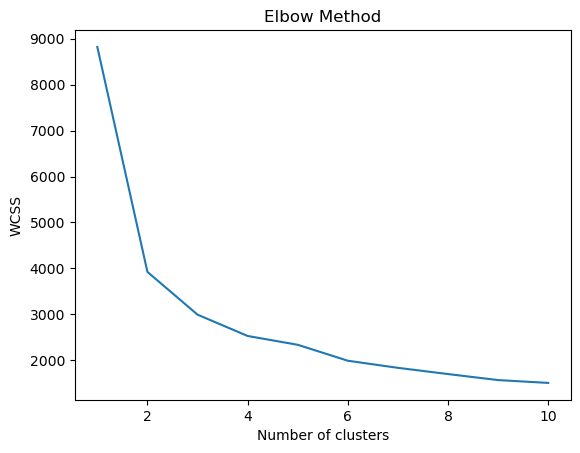

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
features = ['MntTotal', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
X = df[features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


- The **Elbow curve** indicates that **4 clusters** are optimal for grouping the data.  
- This gives a good trade-off between complexity and performance.

 **Insight**: Customers can be meaningfully grouped into 4 distinct behavioral clusters.


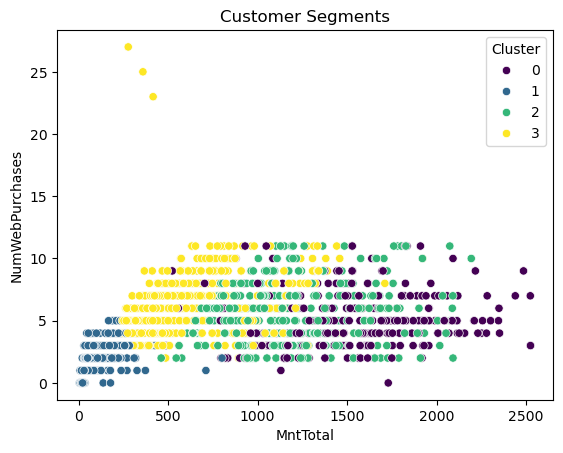

<Axes: xlabel='Cluster', ylabel='count'>

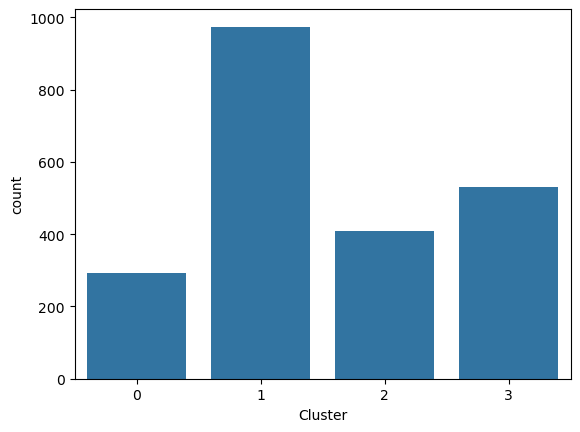

In [16]:
import seaborn as sns

sns.scatterplot(x='MntTotal', y='NumWebPurchases', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()

# Countplot of clusters
sns.countplot(x='Cluster', data=df)


### Cluster Interpretation
- 🟣 **Cluster 0**: High spenders, varying web purchases – **VIP customers**
- 🔵 **Cluster 1**: Low spending, low purchases – **Low-value, less engaged**
- 🟢 **Cluster 2**: Moderate spending and purchases – **Occasional buyers**
- 🟡 **Cluster 3**: Lower spend but high web purchases – **Frequent online shoppers**

**Insights**:
- **Cluster 0**: Target with VIP offers and retention programs.
- **Cluster 3**: Focus on online-exclusive deals and loyalty benefits.
- **Cluster 1**: Consider re-engagement campaigns or low-cost bundles.
- **Cluster 2**: Moderate priority, could be nudged upward.


### Cluster Distribution
- **Cluster 1 (Low-value)**: ~1000 customers
- **Cluster 3 (Frequent buyers)**: ~540 customers
- **Cluster 2 (Moderate)**: ~410 customers
- **Cluster 0 (High spenders)**: ~300 customers

**Insight**:  
- Focus on **retention** for Cluster 0 and 3.  
- Use **upsell strategies** for Cluster 1.  
- Consider personalized outreach for each segment.
